# Session 1: The Quantum Bit (Qubit) and Single Qubit Gates

Welcome to your first step into the fascinating world of quantum computing! In this session, we'll explore:
1.  What a qubit is and how it differs from a classical bit.
2.  The concept of superposition and the Bloch sphere.
3.  How to represent qubit states mathematically.
4.  Fundamental single-qubit operations (gates): X, Y, Z, H, S, T.
5.  Measuring a qubit.

Please consider reviewing the fundamentals of linear algebra (vectors and matrices) and Python (variables and functions) if you feel weak in any of these areas. While not strictly required, they will be helpful for following along with the notebook.

In [ ]:
#!pip install requirements.txt

In [ ]:
# Import necessary Qiskit components
import qiskit
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_aer import AerSimulator

# Standard Python libraries
import numpy as np
import matplotlib.pyplot as plt

print("Qiskit components imported successfully!")
print(f"Qiskit version: {qiskit.__version__}")

Qiskit components imported successfully!
Qiskit version: 2.0.1


**What we've done?:**
We've imported the core `QuantumCircuit` class to begin building our first quantum circuits. This works alongside the `transpile` functionwhich prepares circuits for execution—particularly on specific backends.
The `Statevector` class allows us to inspect the exact quantum state of a simulated circuit, which we'll access through the `AerSimulator`, the modern way to access Qiskit's high-performance quantum simulators.

Additionally, we've imported visualization tools like `plot_histogram` (for displaying measurement outcomes) and `plot_bloch_multivector` (helpful for qubit visualization), both of which are essential for developing an intuitive understanding of quantum behavior. Finally, we’ve included `numpy` which is crucial for numerical operations, especially when working with state vectors and matrices.

## 1. The Classical Bit vs. The Quantum Bit (Qubit)

A **classical bit** is the fundamental unit of information in classical computing. It can **only** exist in one of two states:
*   **0**
*   **1**

Similarly, a **Quantum Bit** or **Qubit** is the fundamental unit of information in quantum computing. It is both a physical system and a mathematical abstraction with properties rooted in complex vector spaces (Hilbert spaces). Like a classical bit, it can take the values **0** or **1** when measured. However, **before measurement** (more about this later), a qubit can also take values in between. Formally, a qubit can exist in a **superposition** of both 0 and 1 simultaneously.  

**Physical Intuition:**
You can think of a classical bit like a standard light switch—either ON (1) or OFF (0). A qubit, in contrast, is more like a dimmer switch that can be set anywhere between the two extremes. In this case, the mix of brightness levels would represent the superposition of both states until it is measured. 

Physically, we can think of several ways to achieve this, like using the electron's spin, which can be "spin up" (conventionally |0⟩), "spin down" (conventionally |1⟩), or a combination of both until measured. Other physical implementations include photon polarization (Xanadu), energy levels of an atom (QuEra Computing) or superconducting qubits (IBM) 

**Math Section: Representing Qubit States**
As mentioned earlier, a qubit is also a mathematical abstraction that we can be represented using 2D column vectors known as "kets" (from Dirac notation, `|ψ⟩`). Specifically, 

*   The state **|0⟩** is represented as:
    $$ |0⟩ = \begin{pmatrix} 1 \\ 0 \end{pmatrix} $$
*   The state **|1⟩** is represented as:
    $$ |1⟩ = \begin{pmatrix} 0 \\ 1 \end{pmatrix} $$

These two states are known as the computational basis states and form an orthonormal basis for the two-dimensional Hilbert space of a single qubit. Then, any qubit state of such space, |ψ⟩ (psi), can be expressed as a linear combination (superposition) of |0⟩ and |1⟩:
$$ |ψ⟩ = \alpha |0⟩ + \beta |1⟩ = \alpha \begin{pmatrix} 1 \\ 0 \end{pmatrix} + \beta \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} \alpha \\ \beta \end{pmatrix} $$
Here, α (alpha) and β (beta) are complex numbers called **probability amplitudes**.

The squares of their magnitudes represent the probabilities of measuring the qubit in the corresponding state:
*   Probability of measuring |0⟩ = |α|²
*   Probability of measuring |1⟩ = |β|²

These probabilities must satisfy the normalization condition:  **|α|² + |β|² = 1**.

**Takeaway:** We cannot determine the exact state of a single qubit through a single measurement. Instead, we can only calculate the probabilities of finding it in particular states—like |0⟩ or |1⟩—based on its quantum state. That’s why the amplitudes α (alpha) and β (beta) are fundamental in quantum computing: they define the qubit’s behavior and the likelihood of different measurement outcomes.

## 2. The Bloch Sphere: Visualizing a single Qubit

The state of a single qubit can be visualized as a point on the surface of a 3D sphere called the **Bloch Sphere**.

*   The **North Pole** typically represents the state |0⟩.
*   The **South Pole** typically represents the state |1⟩.

Any point on the surface represents a valid qubit state.

A general qubit state will be denoted as $|ψ⟩ = \alpha |0⟩ + \beta |1⟩$, or, when parametrized using angles θ (theta) and φ (phi):
$$ |ψ⟩ = \cos(\theta/2) |0⟩ + e^{i\phi} \sin(\theta/2) |1⟩ $$
where:
*   `0 ≤ θ ≤ π` (polar angle from the +Z axis)
*   `0 ≤ φ < 2π` (azimuthal angle from the +X axis in the XY-plane)

**Note:** Only pure states lie on the surface. Mixed states (which we won't cover in detail yet) lie inside the sphere. Global phase (an overall complex factor multiplying the entire state vector, e.g., $e^{i\gamma}(\alpha|0⟩ + \beta|1⟩)$) is not physically distinguishable and does not change the point on the Bloch sphere.

Let's visualize |0⟩ and |1⟩.

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


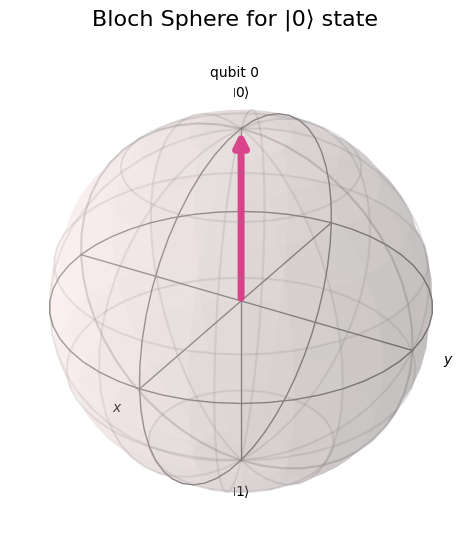

In [25]:
# Visualize |0>
zero_state = Statevector.from_label('0')
print(zero_state)
plot_bloch_multivector(zero_state, title="Bloch Sphere for |0⟩ state")

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


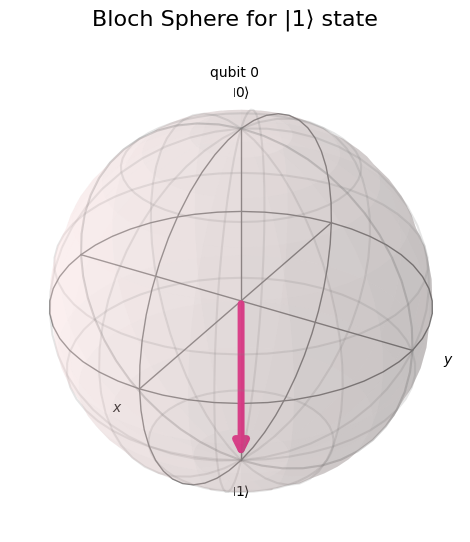

In [26]:
# Visualize |1>
one_state = Statevector.from_label('1')
print(one_state)
plot_bloch_multivector(one_state, title="Bloch Sphere for |1⟩ state")

**Takeaway:**
As expected, the |0⟩ state vector `[1.+0.j 0.+0.j]` points to the North Pole of the Bloch sphere.
The |1⟩ state vector `[0.+0.j 1.+0.j]` points to the South Pole.

## 3. Single Qubit Gates: Operations on Qubits

To manipulate, represent, and transform information in a quantum system, we use quantum gates. These gates act on qubits to change their state, just as classical logic gates (like AND, NOT, OR) operate on bits. However, unlike most classical gates, quantum gates are reversible (except for measurement) and are represented by 2x2 **unitary matrices**.These matrices define linear transformations that preserve the norm (length) of the quantum state vector.


**Math Section: Unitary Matrices**
A matrix U is unitary if its conjugate transpose U† (U-dagger) is also its inverse. That is, U†U = UU† = I, where I is the identity matrix.
$$ U = \begin{pmatrix} a & b \\ c & d \end{pmatrix} \implies U^\dagger = \begin{pmatrix} a^* & c^* \\ b^* & d^* \end{pmatrix} $$

Unitary matries preserve the normalization condition (|α|² + |β|² = 1), which ensures that quantum state vectors remain valid after applying a gate.

On the Bloch sphere, single qubit gates correspond to **rotations** of the state vector.

**Physical Intuition:**
Applying a quantum gate to a qubit is analogous to applying a carefully controlled physical pulse—such as a microwave or laser pulse—to the physical system that implements the qubit. The parameters of the pulse (e.g., duration, frequency, amplitude, phase) determine how the qubit evolves. These controlled interactions result in predictable changes in the qubit’s state—altering its amplitudes (α and β) or equivalently its position on the Bloch sphere (θ and φ). 

### 3.1 The X-Gate (Pauli-X or NOT Gate)

The X-gate flips the state of a qubit between |0⟩ and |1⟩.
*   X|0⟩ = |1⟩
*   X|1⟩ = |0⟩

**Math Section: X-Gate Matrix**
$$ X = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} $$
Applying it to |0⟩:
$$ X|0⟩ = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} (0 \cdot 1) + (1 \cdot 0) \\ (1 \cdot 1) + (0 \cdot 0) \end{pmatrix} = \begin{pmatrix} 0 \\ 1 \end{pmatrix} = |1⟩ $$
Applying it to |1⟩:
$$ X|1⟩ = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} (0 \cdot 0) + (1 \cdot 1) \\ (1 \cdot 0) + (0 \cdot 1) \end{pmatrix} = \begin{pmatrix} 1 \\ 0 \end{pmatrix} = |0⟩ $$

In general, if the X-gate is applied to a qubit with state $|ψ⟩ = \alpha |0⟩ + \beta |1⟩$ the resultant state would have its amplitudes interchanged: 
$$ X|ψ⟩ = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \begin{pmatrix} \alpha \\ \beta \end{pmatrix} =  \begin{pmatrix} \beta \\ \alpha \end{pmatrix}  $$

**Takeaway:**
Physically, the X-gate performs a rotation of π radians (180 degrees) around the X-axis of the Bloch sphere. Similarly, to the NOT logic gate in classical computing. Mathematically, the x-gate interchange the probability amplitudes asigned to the basis states. 


Statevector after X-gate on |0>: [1.+0.j 0.+0.j]


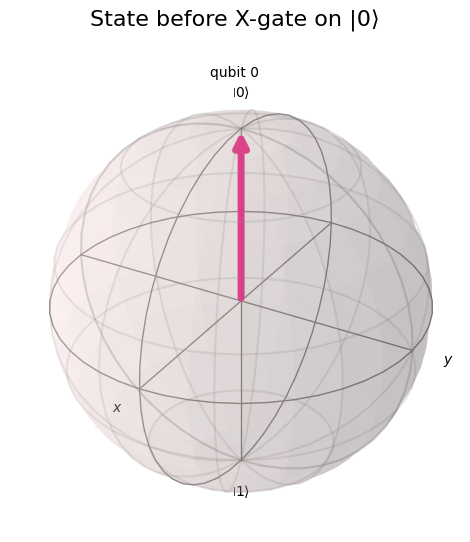

In [51]:
# Create a quantum circuit with 1 qubit
qc_x = QuantumCircuit(1)

# Let's see the statevector, before applying the gate

sv_x_before = Statevector(qc_x)
print(f"\nStatevector after X-gate on |0>: {sv_x_before.data}")
plot_bloch_multivector(sv_x_before, title="State before X-gate on |0⟩")

Circuit diagram for X-gate:
   ┌───┐
q: ┤ X ├
   └───┘


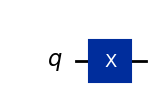

In [52]:
# Now, apply X-gate to qubit 0 (initially in |0> state)
qc_x.x(0)

# And see the circuit
print("Circuit diagram for X-gate:")
print(qc_x.draw(output='text'))
qc_x.draw(output='mpl')


Statevector after X-gate on |0>: [0.+0.j 1.+0.j]


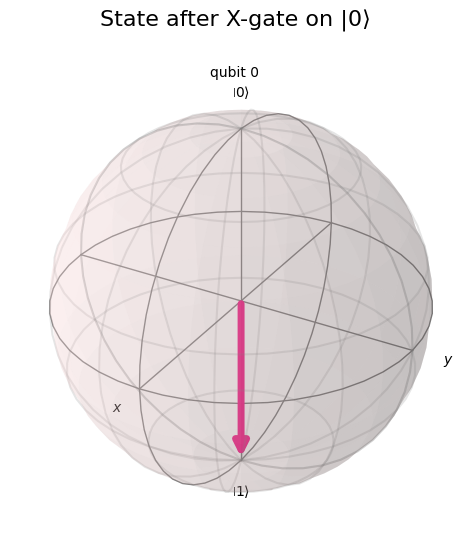

In [53]:
#Now visualize the state on the Bloch sphere
# Let's, get the statevector after the gate
sv_x = Statevector(qc_x)
print(f"\nStatevector after X-gate on |0>: {sv_x.data}")
plot_bloch_multivector(sv_x, title="State after X-gate on |0⟩")


Statevector after X-X on |0⟩: [1.+0.j 0.+0.j]


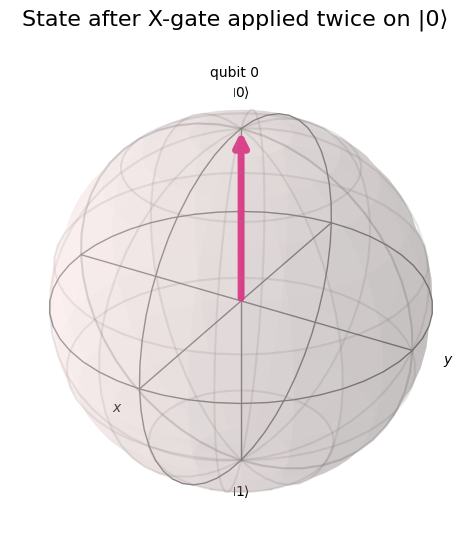

In [54]:
# What happens if we apply X again?
qc_x.x(0) # Apply X-gate a second time
sv_xx = Statevector(qc_x)
print(f"\nStatevector after X-X on |0⟩: {sv_xx.data}")
plot_bloch_multivector(sv_xx, title="State after X-gate applied twice on |0⟩")

Circuit diagram for X-X:
   ┌───┐┌───┐
q: ┤ X ├┤ X ├
   └───┘└───┘


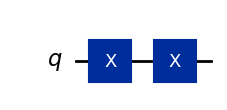

In [56]:
print("Circuit diagram for X-X:")
print(qc_x.draw(output='text'))
qc_x.draw(output='mpl')

**Takeaway:**
We created a `QuantumCircuit` with one qubit. By default, qubits initialize in the |0⟩ state. Applying `qc.x(0)` performs the Pauli-X gate (quantum equivalent of a classical NOT gate) on qubit 0. This gate flips the state from |0⟩ to |1⟩, corresponding to a π rotation around the X-axis of the Bloch sphere. After applying the gate, the `Statevector` output `[0.+0.j, 1.+0.j]`, which is |1⟩ state. The Bloch sphere visualization confirms the qubit has moved to the South Pole, the standard representantion of the |1⟩ state. 

Applying the X-gate twice returns the qubit to its original |0⟩ state. This shows the reversibility of the Pauli-X gate—since it is a unitary (and therefore invertible) operation.

### 3.2 The Y-Gate (Pauli-Y)

The Y-gate also flips |0⟩ to |1⟩ and |1⟩ to |0⟩ but with different phases. Formally, The Pauli-Y gate performs a bit-flip and introduces a phase shift, mapping:
*   Y|0⟩ =  i|1⟩
*   Y|1⟩ = -i|0⟩

**Math Section: Y-Gate Matrix**
$$ Y = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix} $$
**Takeaway:** Rotation by π radians (180 degrees) around the Y-axis of the Bloch sphere.

### 3.3 The Z-Gate (Pauli-Z or Phase Flip Gate)

The Z-gate flips the phase of the |1⟩ state while leaving the |0⟩ state unchanged:

*   Z|0⟩ = |0⟩
*   Z|1⟩ = -|1⟩ 

Although this phase flip doesn't affect measurement probabilities directly (since global phase is unobservable), it does affect interference in superpositions like `(|0> + |1>)/sqrt(2)`. In this case,Z would change it to `(|0> - |1>)/sqrt(2)`, which *is* a different point on the Bloch sphere. We'll see this with the Hadamard gate. 

**Math Section: Z-Gate Matrix**
$$ Z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} $$
**Takeaway:** The Z-gate applies a π rotation about the Z-axis, flipping the phase of the qubit state without changing its position along the Z-axis.

Statevector after Y-gate on |0⟩: [0.+0.j 0.+1.j]


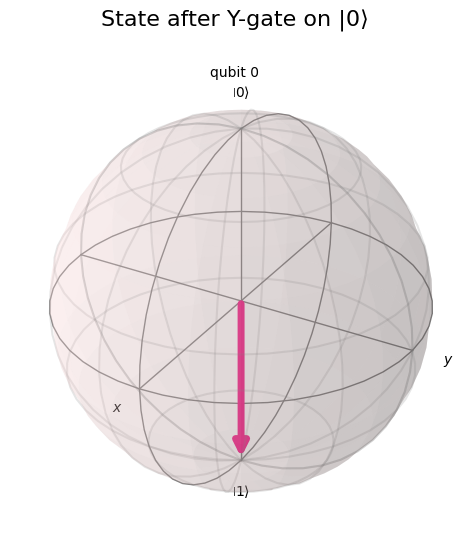

In [59]:
# Y-gate example
qc_y = QuantumCircuit(1)
qc_y.y(0)
sv_y = Statevector(qc_y)
print(f"Statevector after Y-gate on |0⟩: {np.round(sv_y.data, 3)}") # Expect [0, i]
plot_bloch_multivector(sv_y, title="State after Y-gate on |0⟩")


Statevector after Z-gate on |0⟩: [1.+0.j 0.+0.j]


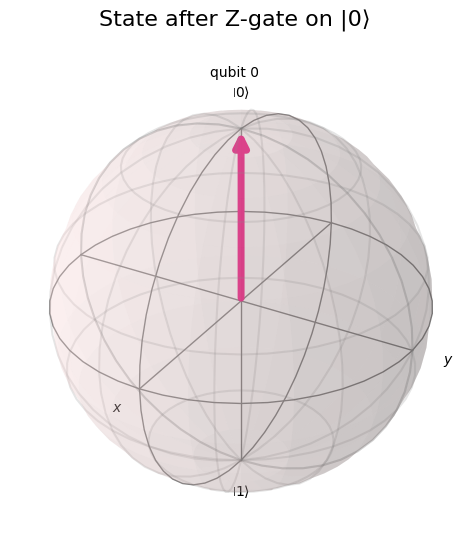

In [60]:
# Z-gate example on |0>
qc_z0 = QuantumCircuit(1)
qc_z0.z(0)
sv_z0 = Statevector(qc_z0)
print(f"\nStatevector after Z-gate on |0⟩: {np.round(sv_z0.data, 3)}") # Expect [1, 0]
plot_bloch_multivector(sv_z0, title="State after Z-gate on |0⟩")


Statevector after Z-gate on |1⟩: [ 0.+0.j -1.+0.j]


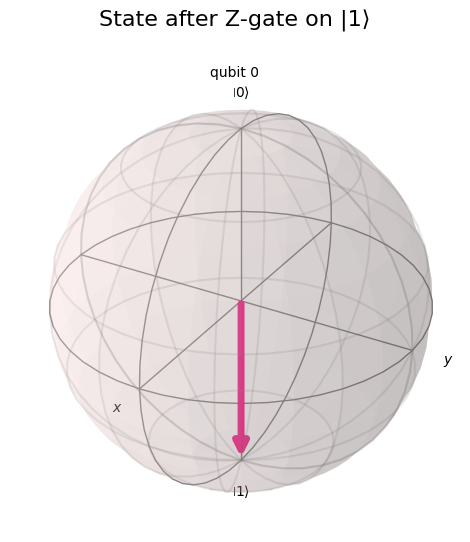

In [61]:
# Z-gate example on |1> (first apply X, then Z)
qc_z1 = QuantumCircuit(1)
qc_z1.x(0) # Qubit is now |1>
qc_z1.z(0) # Apply Z-gate
sv_z1 = Statevector(qc_z1)
print(f"\nStatevector after Z-gate on |1⟩: {np.round(sv_z1.data, 3)}") # Expect [0, -1]
plot_bloch_multivector(sv_z1, title="State after Z-gate on |1⟩")

**Takeaway:**
*   **Y-gate on |0⟩:** The statevector output is `[0.+0.j, 0.+1.j]`, which corresponds to `i|1⟩`. This is a π (180°) rotation around the Y-axis on the Bloch sphere, taking the qubit from the North Pole (|0⟩) to the South Pole (|1⟩) — but with a global phase of i. If the qubit is in a basis state alone (e.g., |1⟩), a global phase like i or -1 has no measurable effect. However, in a superposition, such a phase becomes relative and affects interference patterns.
*   **Z-gate on |0⟩:** Statevector resutls are `[1.+0.j, 0.+0.j]`, which is just |0⟩. A 180-degree rotation around Z keeps the North Pole vector unchanged.
*   **Z-gate on |1⟩:** Starting from |0⟩, we apply an X-gate to get |1⟩, then apply a Z-gate. The output is `[0.+0.j, -1.+0.j]`, which is –|1⟩. Again, the qubit remains at the South Pole, but with a phase flip (a π rotation around Z). This phase is unobservable if you measure immediately in the computational (Z) basis, but it does matter in superposition—for example, in states like:

$$|+⟩ = \frac{1}{\sqrt{2}}(|0⟩ + |1⟩) \rightarrow Z|+⟩ = \frac{1}{\sqrt{2}}(|0⟩ - |1⟩) =|-⟩  $$

So while Z has no effect on |0⟩ or |1⟩ when measured directly, it plays a crucial role in modifying relative phase within superpositions.

### 3.4 The Hadamard Gate (H-Gate)

The Hadamard gate is one of the most important gates in quantum computing. It creates an equal superposition of |0⟩ and |1⟩ when applied to a computational basis state. This meansthe resultant state vector give equal probabilities of measuring either 0 or 1. In particular, 

*   H|0⟩ = (|0⟩ + |1⟩) / √2  (This state is often called the **|+⟩** state)
*   H|1⟩ = (|0⟩ - |1⟩) / √2  (This state is often called the **|–⟩** state)

These |+⟩ and |–⟩ states form an alternative basis, known as the Hadamard basis or the X-basis, because they are eigenstates of the Pauli-X operator. If you apply H to |+⟩, you get |0⟩, and if you apply H to |–⟩, you get |1⟩. So, H acts as a basis change. Applying H twice returns the qubit to its original state (HH = I).

**Math Section: H-Gate Matrix**
$$ H = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} $$
Applying H to |0⟩:
$$ H|0⟩ = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ 1 \end{pmatrix} = \frac{1}{\sqrt{2}}|0⟩ + \frac{1}{\sqrt{2}}|1⟩ = |+⟩ $$
The amplitudes are α = 1/√2 and β = 1/√2.
So, |α|² = 1/2 and |β|² = 1/2. This means, as we said before, that you have a 50% chance of getting 0 and a 50% chance of getting 1.

**Physical Intuition (Bloch Sphere):**
On the Bloch sphere, the Hadamard gate corresponds to a rotation of π (180°) around the axis lying in the XZ-plane, exactly halfway between the X and Z axes.

*   H|0⟩ (North Pole vector) rotates to the +X axis of the Bloch sphere. This is the |+⟩ state.
*   H|1⟩ (South Pole vector) rotates to the -X axis of the Bloch sphere. This is the |–⟩ state.

This transformation maps Z-basis states to X-basis states and vice versa — a concept crucial to quantum algorithms like the Quantum Fourier Transform, Grover's Algorithm, and Quantum Phase Estimation.

Statevector after H-gate on |0> (|+> state): [0.70710678+0.j 0.70710678+0.j]


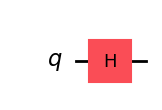

In [ ]:
# H-gate on |0>
qc_h0 = QuantumCircuit(1)
qc_h0.h(0)
sv_h0 = Statevector(qc_h0)
print(f"Statevector after H-gate on |0> (|+> state): {sv_h0.data}")
#visualize quantum circuit
qc_h0.draw(output='mpl')

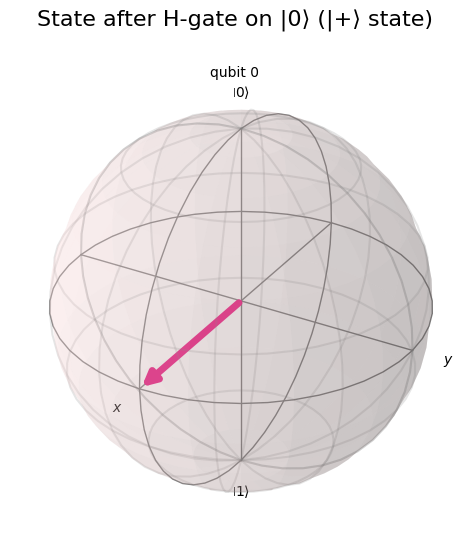

In [67]:
plot_bloch_multivector(sv_h0, title="State after H-gate on |0⟩ (|+⟩ state)")


Statevector after H-gate on |1> (|-> state): [ 0.70710678+0.j -0.70710678+0.j]


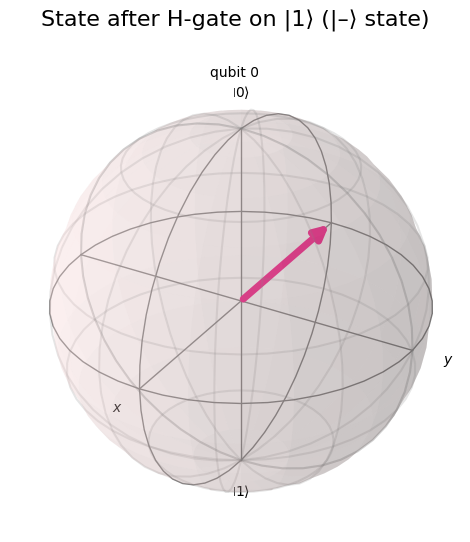

In [71]:
# H-gate on |1>
qc_h1 = QuantumCircuit(1)
qc_h1.x(0) # Qubit is now |1>
qc_h1.h(0) # Apply H-gate
sv_h1 = Statevector(qc_h1)
print(f"\nStatevector after H-gate on |1> (|-> state): {sv_h1.data}") 
plot_bloch_multivector(sv_h1, title="State after H-gate on |1⟩ (|–⟩ state)")


Statevector after H-H on |0⟩: [1.+0.j 0.+0.j]
   ┌───┐┌───┐
q: ┤ H ├┤ H ├
   └───┘└───┘


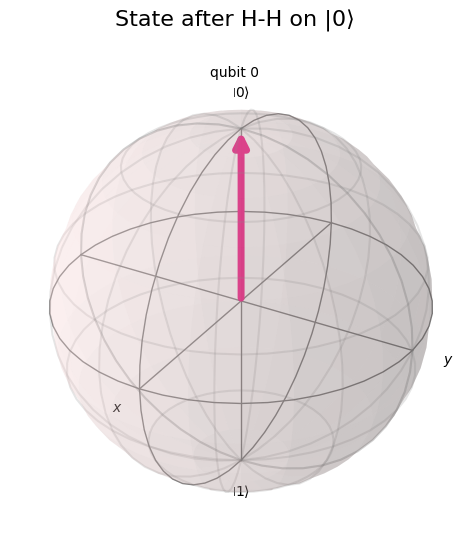

In [73]:
# Apply H twice
qc_hh = QuantumCircuit(1)
qc_hh.h(0)
qc_hh.h(0)
sv_hh = Statevector(qc_hh)
print(f"\nStatevector after H-H on |0⟩: {np.round(sv_hh.data, 3)}")
print(qc_hh.draw(output='text'))
plot_bloch_multivector(sv_hh, title="State after H-H on |0⟩")


**Takeaway:**
The Hadamard gate is fundamental for creating the superpositions that quantum algorithms leverage for parallelism and interference.

### 3.5 Phase Gates: S, S† (Sdg), T, T† (Tdg)

These gates apply a phase shift only to the |1⟩ component of a qubit's state. They leave the |0⟩ component unchanged. They represent rotations around the Z-axis of the Bloch sphere.

**S-Gate (Phase gate, or √Z gate conceptually):**
Rotates around the Z-axis by π/2 radians (90 degrees).
*   S|0⟩ = |0⟩
*   S|1⟩ = i|1⟩
$$ S = \begin{pmatrix} 1 & 0 \\ 0 & i \end{pmatrix} $$
Its inverse is the **S†-gate** (S-dagger or Sdg-gate in Qiskit `qc.sdg(qubit)`), which rotates by -π/2.
$$ S^\dagger = \begin{pmatrix} 1 & 0 \\ 0 & -i \end{pmatrix} $$

**T-Gate (π/8 gate):**
Rotates around the Z-axis by π/4 radians (45 degrees).
*   T|0⟩ = |0⟩
*   T|1⟩ = $e^{\frac{i pi}{4}}|1⟩$
$$ T = \begin{pmatrix} 1 & 0 \\ 0 & e^{i\pi/4} \end{pmatrix} = \begin{pmatrix} 1 & 0 \\ 0 & \frac{1+i}{\sqrt{2}} \end{pmatrix} $$
Its inverse is the **T†-gate** (T-dagger or Tdg-gate in Qiskit `qc.tdg(qubit)`), rotating by -π/4.
$$ T^\dagger = \begin{pmatrix} 1 & 0 \\ 0 & e^{-i\pi/4} \end{pmatrix} $$
The T-gate is particularly important because {H, T} gates form a universal set for single-qubit operations (any single-qubit unitary operation can be approximated arbitrarily well by a sequence of H and T gates).

**Takeaway**
* These gates don't affect measurement probabilities directly (since global phases aren’t observable), but they are critical when a qubit is in a superposition, where relative phases impact interference.
* The set {H, T} is universal for single-qubit operations—meaning any single-qubit unitary can be approximated to arbitrary precision using just H and T gates.

Statevector after S-gate on |+>: [0.70710678+0.j         0.        +0.70710678j]


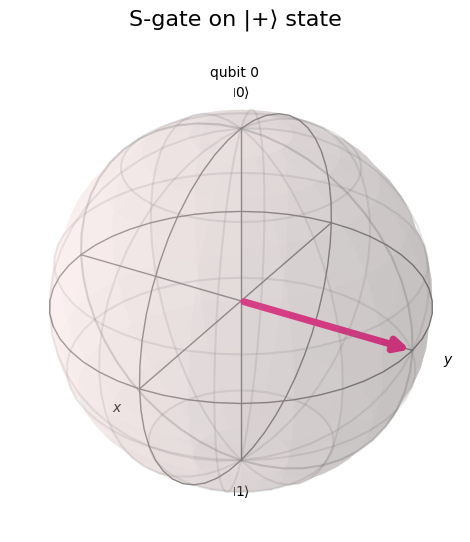

In [74]:
# S-gate example: Apply S to |+> state
qc_s = QuantumCircuit(1)
qc_s.h(0) # Qubit is now |+> = (1/sqrt(2))(|0> + |1>)
qc_s.s(0) # Apply S-gate
sv_s = Statevector(qc_s)
print(f"Statevector after S-gate on |+>: {sv_s.data}")
# Expected: (1/sqrt(2))(|0> + i|1>), which is |+i_Y> state, points along +Y axis
plot_bloch_multivector(sv_s, title="S-gate on |+⟩ state")


Statevector after T-gate on |+>: [0.70710678+0.j  0.5       +0.5j]


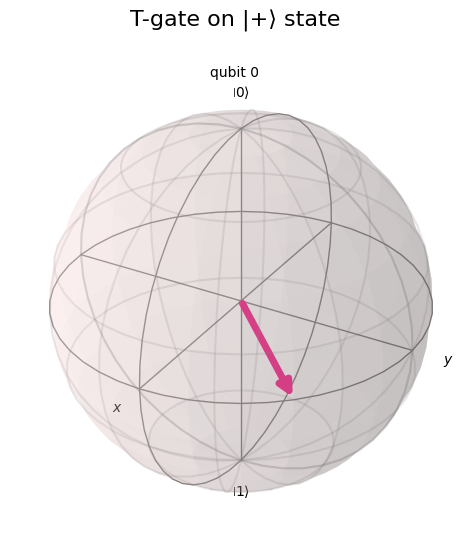

In [75]:
# T-gate example: Apply T to |+> state
qc_t = QuantumCircuit(1)
qc_t.h(0) # Qubit is now |+>
qc_t.t(0) # Apply T-gate
sv_t = Statevector(qc_t)
print(f"\nStatevector after T-gate on |+>: {sv_t.data}")
# Expected: (1/sqrt(2))(|0> + e^(i*pi/4)|1>)
plot_bloch_multivector(sv_t, title="T-gate on |+⟩ state")

**Analysis:**
*   **S-gate on |+⟩:** The state |+⟩ is $(|0⟩ + |1⟩)/√2$. Applying S gives $(|0⟩ + i|1⟩)/√2$. On the Bloch sphere, the vector initially on the +X axis rotates by 90 degrees around the Z-axis to point along the +Y axis. he statevector shows this as a change in the relative phase between the |0⟩ and |1⟩ components (β becomes imaginary).
*   **T-gate on |+⟩:** Similarly, applying T to |+⟩ gives $(|0⟩ + e^{i\pi/4}|1⟩)/√2$. 45° rotation around the Z-axis, moving the statevector from the +X axis toward the +Y direction, but not reaching it fully (as with the S-gate). The result is a point between +X and +Y on the Bloch sphere.

## 4. Measurement: Observing the Qubit

Quantum mechanics is inherently probabilistic when it comes to measurement. When we measure a qubit in a superposition state $|ψ⟩ = \alpha |0⟩ + \beta |1⟩$ in the computational basis ({|0⟩, |1⟩}):
*   We will get the outcome **0** with probability **P(0) = |α|²**.
*   We will get the outcome **1** with probability **P(1) = |β|²**.

**Crucially, measurement "collapses" the superposition.** After measurement, the qubit is no longer in the state $|ψ⟩$. It is definitively in the classical state (0 or 1) that was measured. This process is irreversible.

**Physical Intuition:**
Think of it like tossing a special quantum coin. While it's spinning in the air, it's in a superposition of heads and tails. When it lands (measurement), it must show either heads (0) or tails (1). The act of "landing" forces it into a definite state. In a real quantum system, measurement involves interacting the qubit with a larger classical apparatus (e.g., by shining a specific microwave frequency that causes a detectable shift in a resonator only if the qubit is |1⟩). This interaction amplifies the quantum state to a classical signal, forcing the qubit to "choose" one of the basis states.

Let's measure a qubit in the |+⟩ state (created by H|0⟩).
Theoretically, since $|+⟩ = (1/√2)|0⟩ + (1/√2)|1⟩$, we have α = 1/√2 and β = 1/√2.
So, P(0) = |1/√2|² = 1/2, and P(1) = |1/√2|² = 1/2.

If we repeat the measurement many times, you’ll observe 0 about 50% of the time and 1 about 50% which is consistent with the probabilistic nature of quantum mechanics.

Circuit diagram with measurement:


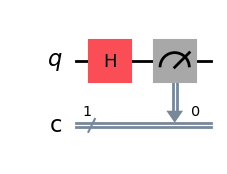

In [ ]:
# Create a circuit with 1 qubit and 1 classical bit for measurement
qc_measure = QuantumCircuit(1, 1) # QuantumCircuit(num_qubits, num_classical_bits)

# Put qubit in |+> state by applying a hadamard gate
qc_measure.h(0)

# Measure qubit 0 and store the result in classical bit 0
qc_measure.measure(0, 0) # qc.measure(qubit_index, classical_bit_index)

print("Circuit diagram with measurement:")
qc_measure.draw(output='mpl')



Counts after 1024 measurements: {'0': 530, '1': 494}


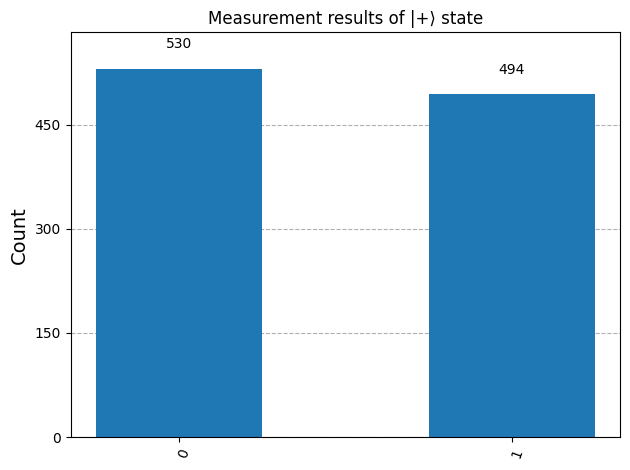

In [77]:
# Let's simulate this circuit multiple times using a simulator
# We'll use AerSimulator for older Qiskit: simulator = Aer.get_backend('qasm_simulator')
simulator = AerSimulator()

# Transpile the circuit for the simulator
compiled_circuit = transpile(qc_measure, simulator)

# Run the simulation - 'shots' is the number of times we repeat the measurement
N_SHOTS = 1024
job = simulator.run(compiled_circuit, shots=N_SHOTS)
result = job.result()

# Get the counts of 0s and 1s
counts = result.get_counts(qc_measure)
print(f"\nCounts after {N_SHOTS} measurements: {counts}")

# Plot the histogram
plot_histogram(counts, title="Measurement results of |+⟩ state")

**Takeaway:**
We created a `QuantumCircuit` with one quantum bit (q0) and one classical bit (c0). The classical bit is necessary to store the outcome of the quantum measurement.
After applying the H-gate, q0 is in the |+⟩ state.

The `measure` instruction links the quantum bit to the classical bit.

The `AerSimulator` mimics the probabilistic nature of quantum measurement. When we run the circuit many times (shots), the `counts` dictionary shows how many times we measured '0' and how many times we measured '1', capturing the distribution of the measurement results. 

As expected from the theory (P(0)=0.5, P(1)=0.5), the histogram shows that the outcomes '0' and '1' occur with roughly equal frequency. Due to the statistical nature, the counts won't be exactly 50/50 for a finite number of shots, but they will tend towards it as `N_SHOTS` increases.

**Important Note:** Once qc.measure(0, 0) is executed, the quantum coherence is lost. If we were to apply additional gates to qubit 0 after measurement, those gates would act on a classical state (|0⟩ or |1⟩), not on the original superposition.

In general, measurement is the final step in most quantum circuits. Continuing to apply gates afterward is only meaningful in conditional logic or feedback scenarios, such as quantum error correction or adaptive circuits.

## 5. Exercises

1.  **Create |–⟩ state and measure:**
    *   Start with a qubit in the |0⟩ state.
    *   Apply gates to transform it into the |–⟩ state: `(|0⟩ - |1⟩)/√2`.
    *   Measure the qubit 1000 times.
    *   Plot the histogram of results. What do you expect?

2.  **X-H sequence:**
    *   Apply an X-gate followed by an H-gate to a qubit initially in |0⟩.
    *   What is the final statevector? (Use `Statevector(circuit)`).
    *   Verify this mathematically. What state is this equivalent to?

3.  **Identity with Gates:**
    *   Show that applying the X-gate twice returns the qubit to its original state. (Hint: plot Bloch sphere before and after XX).
    *   Do the same for the H-gate (HH).

4.  **S† Gate:**
    *   If you apply an S-gate and then an S†-gate (SdgGate in Qiskit: `qc.sdg(0)`), what happens to the state `|+⟩`?
    *   Verify with Bloch sphere and statevector.


 **Z-gate on |+⟩ state:**
    *   Prepare a qubit in the |+⟩ state.
    *   Apply a Z-gate to it.
    *   What is the resulting statevector? (Use `Statevector(your_circuit)` to check).
    *   What state is this? (Hint: It's one of the states we've seen, possibly |–⟩).
    *   Verify this mathematically: Z H |0⟩.

3.  **From |+⟩ to |1⟩:**
    *   Start with a qubit in the |+⟩ state.
    *   Apply a sequence of one or more single-qubit gates (from X, Y, Z, H, S, T and their daggers) to transform it into the |1⟩ state.
    *   Display your circuit and verify the final state using `Statevector` and `plot_bloch_multivector`. (There are multiple solutions!)

4.  **S†S = Identity:**
    *   Apply an S-gate followed by an S†-gate (SdgGate in Qiskit: `qc.sdg(0)`) to a qubit initially in the |+⟩ state.
    *   What is the final state? Verify with `Statevector` and `plot_bloch_multivector`. Does this make sense?

## Summary

Great! You've made it to the end. As a recap, in this session, we've:

*   Defined a qubit and its representation using statevectors and the Bloch sphere.
*   Explored key single-qubit gates: X, Y, Z, H, S, T, understanding their mathematical matrices and their rotational effect on the Bloch sphere.
*   Learned how to create superposition states using the Hadamard gate.
*   Understood the probabilistic nature of quantum measurement and how it collapses superposition.
*   Built, simulated, and visualized simple quantum circuits using Qiskit.

Next up: Multi-Qubit Gates and Entanglement. Keep it up!